In [1]:
%matplotlib inline
import cv2
import numpy as np

from matplotlib import pyplot as plt

import sys
import json
import base64

In [2]:
import ssl
## make it work in both python2 both python3
IS_PY3 = sys.version_info.major == 3
if IS_PY3:
    from urllib.request import urlopen
    from urllib.request import Request
    from urllib.error import URLError
    from urllib.parse import urlencode
    from urllib.parse import quote_plus
else:
    import urllib2
    from urllib import quote_plus
    from urllib2 import urlopen
    from urllib2 import Request
    from urllib2 import URLError
    from urllib import urlencode

In [3]:
## 跳过 HTTPS 身份验证
ssl._create_default_https_context = ssl._create_unverified_context
API_KEY = 'MDHs3BVEhzCusDiRoHP7lmQr'
SECRET_KEY = 'GqSMLWitGGLWkMQMbty9TMQp7RQXWfN2'

API_KEY_CARNUM = 'gEBi84vkxoMaR87MMvvMe9uh'
SECRET_KEY_CARNUM = 'ZgTZRb0xwQsl2GYcsSvWYshhhtTXnGdB'

CAR_CLASS = "https://aip.baidubce.com/rest/2.0/image-classify/v1/car"
VEHICLE_DETECT = "https://aip.baidubce.com/rest/2.0/image-classify/v1/vehicle_detect"
CAR_NUM = "https://aip.baidubce.com/rest/2.0/ocr/v1/license_plate"


""" 开始 TOKEN """
TOKEN_URL = 'https://aip.baidubce.com/oauth/2.0/token'

In [4]:
""" 请求认证 token
"""
def fetch_token(api_key,secret_key):
    params = {'grant_type': 'client_credentials',
        'client_id': api_key,
        'client_secret': secret_key}
    post_data = urlencode(params)
    if (IS_PY3):
        post_data = post_data.encode('utf-8')
    req = Request(TOKEN_URL, post_data)
    try:
        f = urlopen(req, timeout=5)
        result_str = f.read()
    except URLError as err:
        print(err)
    if (IS_PY3):
        result_str = result_str.decode()
    result = json.loads(result_str)
    if ('access_token' in result.keys() and 'scope' in result.keys()):
        if not 'brain_all_scope' in result['scope'].split(' '):
            print ('please ensure has check the ability')
            exit()
        return result['access_token']
    else:
        print ('please overwrite the correct API_KEY and SECRET_KEY')
        exit()

In [5]:
""" 读取图片函数
"""

def read_file(image_path):
    f = None
    try:
        f = open(image_path, 'rb') #用二进制打开图片
        return f.read()
    except:
        print('read image file fail')
        return None
    finally:
        if f:
            f.close()

In [6]:
"""
call remote http server
"""
def request(url, data):
    req = Request(url, data.encode('utf-8'))
    has_error = False
    try:
        f = urlopen(req)
        result_str = f.read()
        if (IS_PY3):
            result_str = result_str.decode()
        return result_str
    except URLError as err:
        print(err)

In [7]:
if __name__ == '__main__':
    ## get access token
    token = fetch_token(API_KEY,SECRET_KEY)
    
    tokenCarnum = fetch_token(API_KEY_CARNUM,SECRET_KEY_CARNUM)
    ## concat url
    url_vehicle = VEHICLE_DETECT + "?access_token=" + token
    file_content = read_file('./img1.jpg')
    response_vehicle = request(url_vehicle, urlencode(
    {
        'image': base64.b64encode(file_content),
        'image_type': 'BASE64',
    }))
    data_vehicle = json.loads(response_vehicle)
    
    
    url_var = CAR_CLASS + "?access_token=" + token
    file_content = read_file('./img1.jpg')
    response_car = request(url_var, urlencode(
    {
        'image': base64.b64encode(file_content),
        'image_type': 'BASE64',
    }))
    data_car = json.loads(response_car)
    
    
    
    url_num = CAR_NUM + "?access_token=" + tokenCarnum
    file_content = read_file('./img1.jpg')
    response_num = request(url_num, urlencode(
    {
        'image': base64.b64encode(file_content),
        'image_type': 'BASE64',
    }))
    data_num = json.loads(response_num)
    
    
    
    
    
    print(data_vehicle)
    print(data_car)
    print(data_num)

{'log_id': 7923980472128990896, 'vehicle_num': {'motorbike': 0, 'tricycle': 0, 'car': 6, 'carplate': 3, 'truck': 1, 'bus': 0}, 'vehicle_info': [{'type': 'car', 'location': {'width': 195, 'top': 204, 'left': 502, 'height': 154}, 'probability': 0.9958329200744629}, {'type': 'car', 'location': {'width': 238, 'top': 201, 'left': 245, 'height': 146}, 'probability': 0.9930700659751892}, {'type': 'car', 'location': {'width': 153, 'top': 213, 'left': 0, 'height': 106}, 'probability': 0.9899030923843384}, {'type': 'car', 'location': {'width': 206, 'top': 192, 'left': 133, 'height': 123}, 'probability': 0.9116846919059753}, {'type': 'car', 'location': {'width': 113, 'top': 197, 'left': 449, 'height': 92}, 'probability': 0.9107747673988342}, {'type': 'car', 'location': {'width': 30, 'top': 182, 'left': 660, 'height': 18}, 'probability': 0.1431853026151657}, {'type': 'truck', 'location': {'width': 55, 'top': 173, 'left': 596, 'height': 36}, 'probability': 0.1072375476360321}, {'type': 'carplate', 

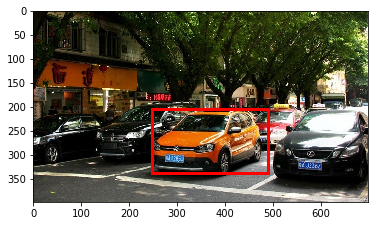

In [8]:
sourceImg = cv2.imread('img1.jpg')
srcImage_new = cv2.cvtColor(sourceImg, cv2.COLOR_BGR2RGB)
plt.imshow(srcImage_new)

plt.gca().add_patch(
    plt.Rectangle((data_car['location_result']['left'], data_car['location_result']['top']), data_car['location_result']['width'],
        data_car['location_result']['height'], fill=False,
        edgecolor='r', linewidth=3)
    )

plt.show()

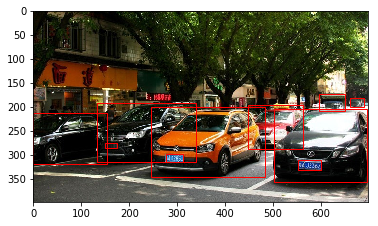

In [11]:
sourceImg = cv2.imread('img1.jpg')
srcImage_new = cv2.cvtColor(sourceImg, cv2.COLOR_BGR2RGB)
plt.imshow(srcImage_new)

for car in data_vehicle['vehicle_info']:
#     print(car['location'])
    plt.gca().add_patch(
        plt.Rectangle((car['location']['left'], car['location']['top']), car['location']['width'],
            car['location']['height'], fill=False,
            edgecolor='r', linewidth=1)
        )

plt.show()

